In [1]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stats

In [2]:
#Frequency value array from previous notebook 
k_values = [[4.44,3.51,3.14,3.51],[3.51, 2.22, 1.57, 2.22],[3.14, 1.57, 0, 1.57], [3.51, 2.22, 1.57, 2.22]]


In [3]:
#Frequency value array from previous notebook
P_k = [[0.71, 1.6,  0.21, 1.6 ],[0.39, 0.18, 1.2, 1.24],[0.06, 0.22, 0.07, 0.22],
       [0.39, 1.24, 1.2, 0.18]]

In [4]:
#Making my own start and end arrays

max_k = np.max(k_values)
print("Upper Bin Limit", max_k)

def create_bins(max_bin_value, num_bins):
    bin_size = max_bin_value / num_bins
    bin_starts = [bin_size * i for i in range(num_bins)]
    bin_ends = [bin_size * (i+1) for i in range(num_bins)]
    return bin_starts, bin_ends

Upper Bin Limit 4.44


In [5]:
start, end = create_bins(max_k, 5)

print(np.round(start, 2))
print(np.round(end, 2))

[0.   0.89 1.78 2.66 3.55]
[0.89 1.78 2.66 3.55 4.44]


In [6]:
#From previous notebook (Power Spectra Intro)
def find_element_positions(input_k, start, end):
    positions = []
    #iterating through each element in the start and end arrays
    for k in range(len(start)):
        sub_positions = []
        #iterating through first dimension of input_k
        for i in range(len(input_k)):
            #iterating through second dimension of input_k
            for j in range(len(input_k[0])):
                #for elements within our inputted desired range
                if start[k] <= input_k[i][j] <= end[k]:
                    sub_positions.append((i, j))
        positions.append(sub_positions)
        
    #will return tuples that given the locations of the elements in the given range
    return positions

In [7]:
#From previous notebook (Power Spectra Intro)
    
def get_corresponding_values(input_k, fourier_array, start, end):
    #calling function that returns position tuples
    positions = find_element_positions(input_k, start, end)
    
    #empty list to store the values
    values = []
    
    #iterate through rows in the positions array
    for pos_row in positions:
        #initialize an empty list to store each row's values
        row_values = []
        #iterate through pair of indices in the row
        for i, j in pos_row:
            #index into fourier array and store value
            row_values.append(fourier_array[i][j])
            
        #append values for this row into overall values list
        values.append(row_values)
    
    return values


In [8]:
find_element_positions(k_values, start, end)

[[(2, 2)],
 [(1, 2), (2, 1), (2, 3), (3, 2)],
 [(1, 1), (1, 3), (3, 1), (3, 3)],
 [(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (3, 0)],
 [(0, 0)]]

In [9]:
get_corresponding_values(k_values, P_k, start, end)

[[0.07],
 [1.2, 0.22, 0.22, 1.2],
 [0.18, 1.24, 1.24, 0.18],
 [1.6, 0.21, 1.6, 0.39, 0.06, 0.39],
 [0.71]]

In [10]:
#From Previous notebook (Power Spectra Intro)

def avg_corresponding_values(input_k, fourier_array, start, end):
    
    #get our corresponding values 2D array
    values = get_corresponding_values(input_k, fourier_array, start, end)
    
    #creating empty avg_values array
    avg_values = []
    #separating out ranges
    for row in values:
        row_sum = 0
        #for each value in the row
        for i in row:
            row_sum += i
            #taking the average value for the row
            avg = row_sum/len(row)
            
        avg_values.append(avg)
    
    return avg_values
    

In [11]:
avg_corresponding_values(k_values, P_k, start, end)

[0.07, 0.71, 0.7100000000000001, 0.7083333333333334, 0.71]

In [12]:
#SHOULD EXPECT A FLAT LINE IN YOUR FINAL P(K) VS K PLOT
#Maybe some noise due to the fact that it is such a small plot

def power_spectra_plot(input_k, fourier_array, start, end):
    
    #Getting the average fourier value for the chosen k range
    avg_values = avg_corresponding_values(input_k, fourier_array, start, end)
    #List of integers from our chosen range values
    #Will be the labels for the x-axis
    range_values = list(range(len(start)))
    
    F1 = plt.figure(figsize = (8,8))
    plt.style.use("fast")
    hfont = {'fontname':'Times New Roman'}
    
    plt.plot(range_values, avg_values)
    
    #Plot Titles
    plt.suptitle("Power Spectrum from a 2D Toy Box", size = 30, **hfont)
    plt.xlabel(r"k [$\mathregular{Mpc^{-1}}$]", size=25, **hfont)
    plt.ylabel(r"$\mathregular{P(k) [mK^2]}$", size = 25, **hfont) 

    #Tick Parameters
    plt.tick_params(bottom=True, top=True, left=True, right=True, which='major', 
                    direction = "in", labelsize=20, width=1.3, color='black')
    plt.tick_params(top= True, right = True, axis='both', which='minor', direction='in', 
                    labelsize = 20, length=5, width=1.3)
    plt.yticks(fontname = "Times New Roman") 
    plt.xticks(fontname = "Times New Roman") 
    
    plt.tight_layout()
    
    F1.savefig("Power Spectrum from a 2D Toy Box", format="png", dpi=1200)

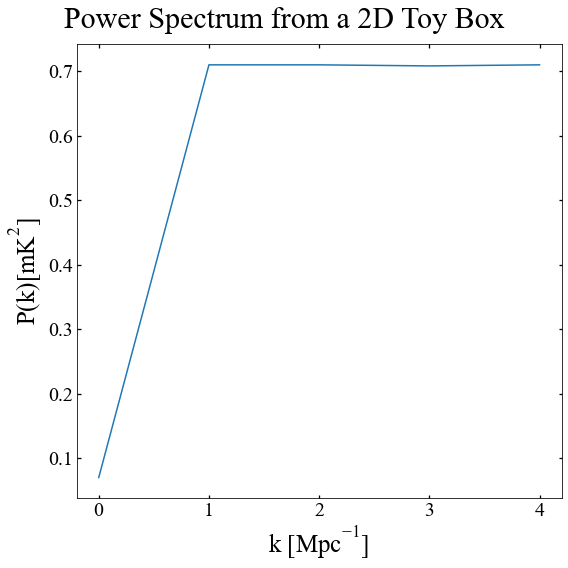

In [13]:
power_spectra_plot(k_values, P_k, start, end)